In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

In [2]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.reset() # reset the environment to the new, random position
env.render()
action_size = env.action_space.n
print("Action size:", action_size)

state_size = env.observation_space.n
print("State size:", state_size)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action size: 6
State size: 500


In [4]:
state = env.encode(3, 1, 2, 0) # (taxi-row, taxi-column, passenger-index, destination-index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [6]:
episodes = 300
sum_of_epochs = 0
sum_of_penalties = 0
frames = [] # for animation
reward_list=[]


for i in range(episodes): #looping 300 episodes
    #set current state to starting environment
    state = env.reset() 
    epochs = 0
    penalties = 0
    episode_reward = 0



    done = False
    while not done: # while episodes not done will choose and taking random action 
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

        epochs += 1 # increment the cumulative epoch
        episode_reward+=reward # increment the cumulative reward
    
    reward_list.append(episode_reward) # append the episode cumulative reward to the reward list
    sum_of_epochs += epochs        #get sum of epochs
    sum_of_penalties += penalties  #get sum of penalties

print("shows result of timesteps and penalties after completing 300 episodes:")
print("Timestep: ", sum_of_epochs)
print("Penalties:", sum_of_penalties)

shows result of timesteps and penalties after completing 300 episodes:
Timestep:  754540
Penalties: 244382


In [7]:
def show_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
show_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 705
State: 423
Action: 4
Reward: -10


KeyboardInterrupt: 

Text(0.5, 1.0, 'avrage of Random timesteps and paneltiy for 300 episodes')

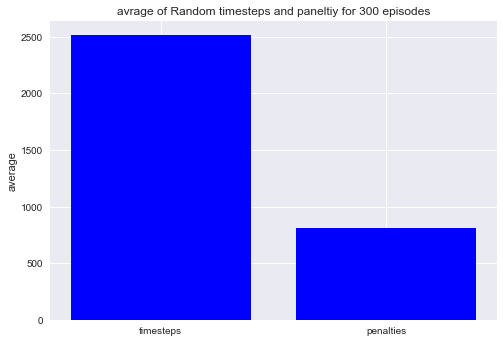

In [7]:
#graph random of timesteps and penalties using the average of both result
plt.style.use('seaborn')
x = ['timesteps','penalties']
rand_ave = [sum_of_epochs/episodes, sum_of_penalties/episodes]
plt.bar(x, rand_ave, color='blue')
plt.ylabel("average")
plt.title("avrage of Random timesteps and paneltiy for 300 episodes")